In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import time

# Your correct bucket name and folder
bucket = "dataproc-staging-us-central1-880524088642-jnl8ctzi"
prefix = f"gs://{bucket}/spark-data/"

spark = SparkSession.builder.appName("PerformanceTest").getOrCreate()

files = ["data_1.csv", "data_2.csv", "data_3.csv", "data_4.csv", "data_5.csv"]
runtimes = []

for file in files:
    path = prefix + file
    print(f"Processing {file} from {path}")
    df = spark.read.option("header", True).csv(path)
    start = time.time()
    df.groupBy("Country").agg(avg("Index")).show()
    end = time.time()
    runtimes.append(end - start)

spark.stop()
print("Runtimes (seconds):", runtimes)


Processing data_1.csv from gs://dataproc-staging-us-central1-880524088642-jnl8ctzi/spark-data/data_1.csv


+-------+----------+
|Country|avg(Index)|
+-------+----------+
|  China|     950.0|
|  India|     900.0|
|    USA|    1000.0|
|Country|      NULL|
+-------+----------+

Processing data_2.csv from gs://dataproc-staging-us-central1-880524088642-jnl8ctzi/spark-data/data_2.csv
+-------+----------+
|Country|avg(Index)|
+-------+----------+
|  China|     950.0|
|  India|     900.0|
|    USA|    1000.0|
|Country|      NULL|
+-------+----------+

Processing data_3.csv from gs://dataproc-staging-us-central1-880524088642-jnl8ctzi/spark-data/data_3.csv
+-------+----------+
|Country|avg(Index)|
+-------+----------+
|  China|     950.0|
|  India|     900.0|
|    USA|    1000.0|
|Country|      NULL|
+-------+----------+

Processing data_4.csv from gs://dataproc-staging-us-central1-880524088642-jnl8ctzi/spark-data/data_4.csv
+-------+----------+
|Country|avg(Index)|
+-------+----------+
|  China|     950.0|
|  India|     900.0|
|    USA|    1000.0|
|Country|      NULL|
+-------+----------+

Processin

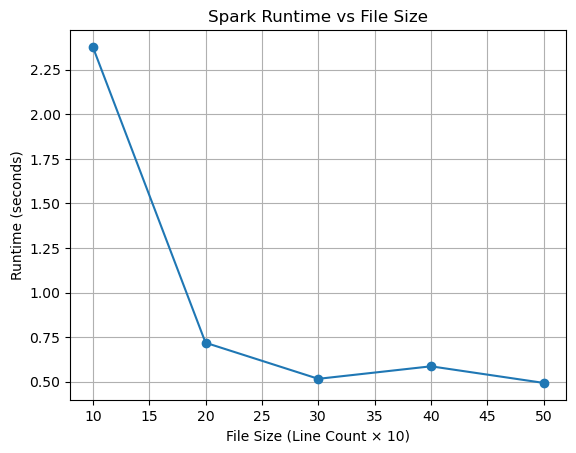

In [20]:
import matplotlib.pyplot as plt

sizes = [10, 20, 30, 40, 50]  # adjust if your files have different row counts
plt.plot(sizes, runtimes, marker='o')
plt.xlabel("File Size (Line Count × 10)")
plt.ylabel("Runtime (seconds)")
plt.title("Spark Runtime vs File Size")
plt.grid(True)
plt.savefig("runtime_plot.png")
plt.show()
